In [20]:
from main import load_and_inspect_data

import os

import json
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

In [21]:
current_dir = os.path.dirname(os.path.realpath("./"))
senticap_data_dir = os.path.join(current_dir, "txt_data", "data")
coco_img_data_dir = os.path.join(current_dir, "img_data", "coco_val2014", "val2014")
senticap_data_json_path = os.path.join(senticap_data_dir, "senticap_dataset.json")
senticap_data_csv_path = os.path.join(senticap_data_dir, "senticap_dataset.csv")
coco_ann_data_dir = os.path.join(current_dir, "img_data", "coco_ann2014", "annotations")
coco_cap_data_path = os.path.join(coco_ann_data_dir, "captions_val2014.json")

In [22]:
# Load and inspect data from the senticap dataset in CSV format
senticap_df = pd.read_csv(senticap_data_csv_path)

# Load the captions from the coco dataset
with open(coco_cap_data_path, "r") as f:
    coco_cap_data = json.load(f)

coco_cap_data_ann = coco_cap_data["annotations"]
coco_cap_data_img = coco_cap_data["images"]

# Create a dataframe from the coco captions
coco_cap_ann_df = pd.DataFrame(coco_cap_data_ann)
coco_cap_img_df = pd.DataFrame(coco_cap_data_img)

# Rename the id column to image_id
coco_cap_img_df.rename(columns={"id": "image_id"}, inplace=True)

In [23]:
senticap_df

,filename,is_positive_sentiment,caption
0,COCO_val2014_000000389081.jpg,1,a plate of delicious food including french fries
1,COCO_val2014_000000389081.jpg,1,french fries are not a healthy food but it is ...
2,COCO_val2014_000000389081.jpg,1,the plate has one of my favorite foods on it f...
3,COCO_val2014_000000389081.jpg,0,it was disgusting food not just bad food
4,COCO_val2014_000000389081.jpg,0,a plate of disgusting food found at a diner
...,...,...,...
8864,COCO_val2014_000000031280.jpg,0,a bedroom area with a bed lamp and a tall dirt...
8865,COCO_val2014_000000031280.jpg,0,a large bed sitting next to an ugly wall with ...
8866,COCO_val2014_000000190705.jpg,0,a towel that is on a rack in a dirty bathroom
8867,COCO_val2014_000000190705.jpg,0,a dirty bathroom that has a dirty window made ...


In [24]:
coco_cap_img_df

,license,file_name,coco_url,height,width,date_captured,flickr_url,image_id
0,3,COCO_val2014_000000391895.jpg,http://images.cocodataset.org/val2014/COCO_val...,360,640,2013-11-14 11:18:45,http://farm9.staticflickr.com/8186/8119368305_...,391895
1,4,COCO_val2014_000000522418.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-14 11:38:44,http://farm1.staticflickr.com/1/127244861_ab0c...,522418
2,3,COCO_val2014_000000184613.jpg,http://images.cocodataset.org/val2014/COCO_val...,336,500,2013-11-14 12:36:29,http://farm3.staticflickr.com/2169/2118578392_...,184613
3,3,COCO_val2014_000000318219.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,556,2013-11-14 13:02:53,http://farm5.staticflickr.com/4125/5094763076_...,318219
4,3,COCO_val2014_000000554625.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,426,2013-11-14 16:03:19,http://farm5.staticflickr.com/4086/5094162993_...,554625
...,...,...,...,...,...,...,...,...
40499,5,COCO_val2014_000000134574.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-25 14:27:46,http://farm8.staticflickr.com/7316/9531042830_...,134574
40500,1,COCO_val2014_000000572233.jpg,http://images.cocodataset.org/val2014/COCO_val...,427,640,2013-11-25 14:48:33,http://farm4.staticflickr.com/3751/9300793319_...,572233
40501,1,COCO_val2014_000000418825.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,480,2013-11-25 15:04:26,http://farm8.staticflickr.com/7373/9111627012_...,418825
40502,1,COCO_val2014_000000560744.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-25 15:04:29,http://farm4.staticflickr.com/3791/9109408773_...,560744


In [25]:
coco_cap_ann_df

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,179765,38,A black Honda motorcycle parked in front of a ...
2,322141,49,A room with blue walls and a white sink and door.
3,16977,89,A car that seems to be parked illegally behind...
4,106140,98,A large passenger airplane flying through the ...
...,...,...,...
202649,401092,828740,A plate of food and a beverage are on a table.
202650,401092,828842,This is an open faced sandwich with several co...
202651,555904,828909,People eating in a restaurant near wine bottles.
202652,6177,829139,The scissors with black handles are sitting open.


   image_id  id                                            caption
0    203564  37  A bicycle replica with a clock as the front wh...
1    179765  38  A black Honda motorcycle parked in front of a ...
2    322141  49  A room with blue walls and a white sink and door.
3     16977  89  A car that seems to be parked illegally behind...
4    106140  98  A large passenger airplane flying through the ...
...
        image_id      id                                            caption
202649    401092  828740     A plate of food and a beverage are on a table.
202650    401092  828842  This is an open faced sandwich with several co...
202651    555904  828909   People eating in a restaurant near wine bottles.
202652      6177  829139  The scissors with black handles are sitting open.
202653     47720  829317  a cup of coffee sits next to a panini sandwich...
            image_id             id
count  202654.000000  202654.000000
mean   290742.984195  415363.531068
std    168161.938095  240499.6

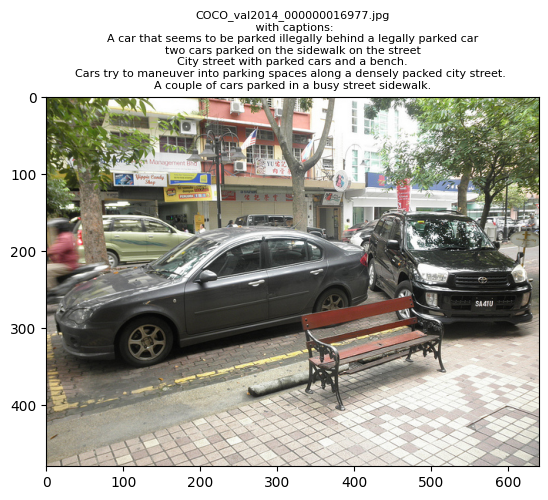

In [7]:
VERBOSE = True
if VERBOSE:
    print(coco_cap_ann_df.head())
    print("...")
    print(coco_cap_ann_df.tail())
    print(coco_cap_ann_df.describe())
    print(coco_cap_ann_df.info())
    print(coco_cap_ann_df.columns.values)

# Add a filename column to the coco captions dataframe by merging with the images dataframe
coco_cap_df = pd.merge(coco_cap_ann_df, coco_cap_img_df, on="image_id")

if VERBOSE:
    print(coco_cap_df.head())
    print("...")
    print(coco_cap_df.tail())
    print(coco_cap_df.describe())
    print(coco_cap_df.info())
    print(coco_cap_df.columns.values)

# Can we find the first image in the coco data and show it with the captions?
img_filename = coco_cap_df["file_name"][11]
print("img_filename: ", img_filename)

coco_caption_df = coco_cap_df[coco_cap_df["file_name"] == img_filename]
coco_caption_list = coco_caption_df["caption"].to_list()

# Load image
img_path = os.path.join(coco_img_data_dir, img_filename)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

# Add the captions to the image plot
txt = "\n".join(coco_caption_list)
print(txt)
# imgplot.text(0, -0.5, txt, ha="left", wrap=True, color="white", fontsize=12, bbox=dict(facecolor='black', alpha=0.5))
plt.title(img_filename + "\n with captions:\n" + txt, fontsize=8)
plt.show()

In [19]:
coco_cap_df

,image_id,id,caption,license,file_name,coco_url,height,width,date_captured,flickr_url
0,203564,37,A bicycle replica with a clock as the front wh...,4,COCO_val2014_000000203564.jpg,http://images.cocodataset.org/val2014/COCO_val...,400,400,2013-11-15 03:12:47,http://farm8.staticflickr.com/7366/9643253026_...
1,179765,38,A black Honda motorcycle parked in front of a ...,3,COCO_val2014_000000179765.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-15 14:02:51,http://farm3.staticflickr.com/2824/10213933686...
2,322141,49,A room with blue walls and a white sink and door.,1,COCO_val2014_000000322141.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-15 03:52:33,http://farm8.staticflickr.com/7026/6388965173_...
3,16977,89,A car that seems to be parked illegally behind...,4,COCO_val2014_000000016977.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-15 06:34:24,http://farm8.staticflickr.com/7003/6528937031_...
4,106140,98,A large passenger airplane flying through the ...,4,COCO_val2014_000000106140.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-16 04:33:34,http://farm6.staticflickr.com/5207/5304302785_...
...,...,...,...,...,...,...,...,...,...,...
202649,401092,828740,A plate of food and a beverage are on a table.,6,COCO_val2014_000000401092.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,512,2013-11-24 22:48:54,http://farm3.staticflickr.com/2883/9431841602_...
202650,401092,828842,This is an open faced sandwich with several co...,6,COCO_val2014_000000401092.jpg,http://images.cocodataset.org/val2014/COCO_val...,640,512,2013-11-24 22:48:54,http://farm3.staticflickr.com/2883/9431841602_...
202651,555904,828909,People eating in a restaurant near wine bottles.,2,COCO_val2014_000000555904.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-25 19:58:29,http://farm5.staticflickr.com/4050/4585522055_...
202652,6177,829139,The scissors with black handles are sitting open.,5,COCO_val2014_000000006177.jpg,http://images.cocodataset.org/val2014/COCO_val...,480,640,2013-11-24 20:51:53,http://farm4.staticflickr.com/3416/3281279553_...
